In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Exercise 1: 

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

0.40600584970983794
0.32332358381693654
0.8646647167633873


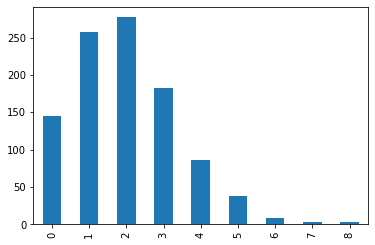

In [170]:
pd.Series(stats.poisson(2).rvs(1000)).value_counts().sort_index().plot.bar()
print(stats.poisson(2).cdf(1))
print(stats.poisson(2).sf(2))
print(stats.poisson(2).sf(0))

2.007548531778879

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    What grade point average is required to be in the top 5% of the graduating class?

    What GPA constitutes the bottom 15% of the class?

    An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

    If I have a GPA of 3.5, what percentile am I in?


AxesSubplot(0.125,0.125;0.775x0.755)
GPAs above 3.4934560880854417 are in the top 5% of the graduating class.
GPAs below 2.689069983151863 are in the bottom 15% of the graduating class.
GPAs from zero to 2.842679846187588 make up the range of the third decile.
A GPA of 2.8 ranks in the 25.24925375469227th percentile, which is in the bottom third decile. Thus, it qualifies for the scholarship.
A GPA of 3.5 ranks in the 95.22096477271853th percentile.


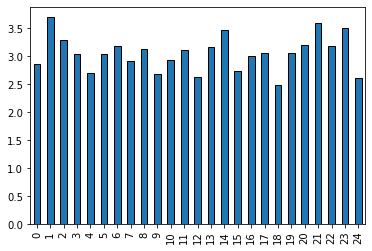

In [145]:
state_uni_grads = stats.norm(3, .3)

print(pd.Series(state_uni_grads.rvs(25)).plot.bar(ec= 'black'))

top_five_pct = state_uni_grads.ppf(.95)
print(f'GPAs above {top_five_pct} are in the top 5% of the graduating class.')

bottom_fifteen_pct = state_uni_grads.ppf(.15)
print(f'GPAs below {bottom_fifteen_pct} are in the bottom 15% of the graduating class.')

print(f'GPAs from zero to {state_uni_grads.ppf(.3)} make up the range of the third decile.')

print(f'A GPA of 2.8 ranks in the {state_uni_grads.cdf(2.8) * 100}th percentile, which is in the bottom third decile. Thus, it qualifies for the scholarship.') 
print(f'A GPA of 3.5 ranks in the {state_uni_grads.cdf(3.5) * 100}th percentile.')

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

There is a 13.98% chance that 97 or more people click through the site.


Text(0.5, 0, 'Numbers of click-throughs')

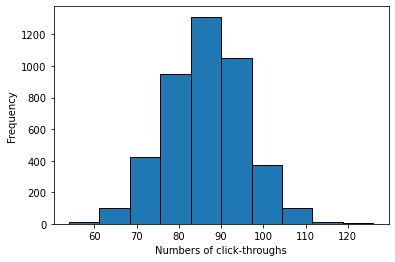

In [167]:
mktng_site = stats.binom(4326, 0.02)

print(f'There is a {round(mktng_site.sf(96) * 100,2)}% chance that 97 or more people click through the site.')

pd.Series(mktng_site.rvs(4326)).plot.hist(ec='black')
plt.xlabel('Numbers of click-throughs')

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    What is the probability that at least one of your first 60 answers is correct?

There is a 45.28433576092385% chance that one of your first 60 answers is correct.


Text(0.5, 1.0, 'Random Answers')

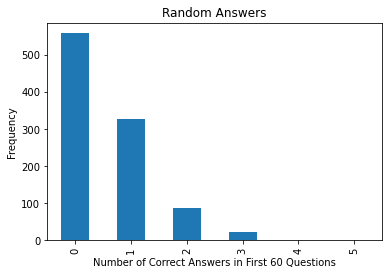

In [168]:
test_answers = stats.binom(60, 0.01)

print(f'There is a {test_answers.sf(0) * 100}% chance that one of your first 60 answers is correct.')

pd.Series(test_answers.rvs(1000)).value_counts().sort_index().plot.bar()
plt.xlabel('Number of Correct Answers in First 60 Questions')
plt.ylabel('Frequency')
plt.title('Random Answers')

#I don't know if that's right... I'm assuming a 1% overall probability of success...





### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

There is a 3.1925151700908385% chance that the break room will be cleaned every day.
There is a 53.17140258060146% chance that the breakroom will go two days without being cleaned.
There is a 46.82859741939854% chance the break room will be a pig sty all week.


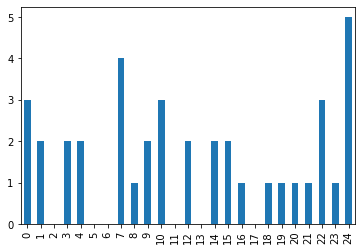

In [148]:
brkrm_clean = stats.binom(59, 0.03)

pd.Series(brkrm_clean.rvs(25)).plot.bar()

print(f'There is a {brkrm_clean.sf(4) * 100}% chance that the break room will be cleaned every day.')
print(f'There is a {brkrm_clean.sf(1) * 100}% chance that the breakroom will go two days without being cleaned.')
print(f'There is a {brkrm_clean.cdf(1) * 100}% chance the break room will be a pig sty all week.')

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [169]:
pan_cola = stats.norm(15, 3)

# Doing the math: 60 - (2x +10) <= 15, so, there can be no more than 17 people in line in order for you to have at least 15 minutes to eat.

print(f'There is a {round(pan_cola.cdf(17) * 100,1)}% chance you will have at least 15 minutes to eat your lunch from La Panaderia before class resumes.')


There is a 74.8% chance you will have at least 15 minutes to eat your lunch from La Panaderia before class resumes.


### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    What percent of employees earn less than 60,000?

    What percent of employees earn more than 95,000?

    What percent of employees earn between 65,000 and 80,000?

    What do the top 5% of employees make?

In [113]:
from env import get_db_url

url = get_db_url('employees')
pd.read_sql('SHOW TABLES', url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [114]:
pd.read_sql('DESCRIBE salaries', url)

,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,salary,int,NO,,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,NO,,None,


In [126]:
pd.read_sql('DESCRIBE employees', url)

,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,birth_date,date,NO,,None,
2,first_name,varchar(14),NO,,None,
3,last_name,varchar(16),NO,,None,
4,gender,"enum('M','F')",NO,,None,
5,hire_date,date,NO,,None,


In [149]:
salaries_data = pd.read_sql('SELECT * FROM salaries JOIN dept_emp ON salaries.emp_no = dept_emp.emp_no WHERE dept_emp.to_date < CURDATE()', url)

salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617358 entries, 0 to 617357
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     617358 non-null  int64 
 1   salary     617358 non-null  int64 
 2   from_date  617358 non-null  object
 3   to_date    617358 non-null  object
 4   emp_no     617358 non-null  int64 
 5   dept_no    617358 non-null  object
 6   from_date  617358 non-null  object
 7   to_date    617358 non-null  object
dtypes: int64(3), object(5)
memory usage: 37.7+ MB


In [150]:
salaries_data.to_csv('~/codeup-data-science/statistics-exercises/salaries_data.csv')

In [173]:
pd.read_csv('salaries_data.csv')

,Unnamed: 0,emp_no,salary,from_date,to_date,emp_no.1,dept_no,from_date.1,to_date.1
0,0,10008,46671,1998-03-11,1999-03-11,10008,d005,1998-03-11,2000-07-31
1,1,10008,48584,1999-03-11,2000-03-10,10008,d005,1998-03-11,2000-07-31
2,2,10008,52668,2000-03-10,2000-07-31,10008,d005,1998-03-11,2000-07-31
3,3,10010,72488,1996-11-24,1997-11-24,10010,d004,1996-11-24,2000-06-26
4,4,10010,74347,1997-11-24,1998-11-24,10010,d004,1996-11-24,2000-06-26
...,...,...,...,...,...,...,...,...,...
617353,617353,499992,73574,1999-05-07,2000-05-06,499992,d003,1987-05-10,1995-05-31
617354,617354,499992,76708,2000-05-06,2001-05-06,499992,d003,1987-05-10,1995-05-31
617355,617355,499992,79327,2001-05-06,2002-05-06,499992,d003,1987-05-10,1995-05-31
617356,617356,499992,80389,2002-05-06,9999-01-01,499992,d003,1987-05-10,1995-05-31


In [207]:
avg_emp_sal = salaries_data.salary.mean()
std_emp_sal = salaries_data.salary.std()

emp_sal_norm = stats.norm(avg_emp_sal, std_emp_sal)

#pd.Series(emp_sal_norm.rvs(25)).plot.bar()

salary_above_65k = salaries_data.salary >= 64_999
print(f'{round(salary_above_65k.sum() / len(salaries_data) * 100,1)}% of employees make more than $65k.')

#print(f'{round(emp_sal_norm.cdf(60_000) * 100,1)}% of employees earn less than $60,000.')
#print(f'{round(emp_sal_norm.sf(94_999) * 100,1)}% of employees earn more than $95,000.')
print(f'{round(emp_sal_norm.sf(64_999) * 100,1)}% of employees earn more than $65,000.')
#print(f'{round(emp_sal_norm.cdf(80_000) * 100,1)}% of employees earn less than $80,000.')
print(f'{((round(emp_sal_norm.cdf(80_000) * 100,1)) - (round(emp_sal_norm.sf(64_999) * 100,1))) / 2}% of employees make between $65,000 and $80,000... close, but it might be a fluke.')

37.0% of employees make more than $65k.
42.3% of employees earn more than $65,000.
22.1% of employees make between $65,000 and $80,000... maybe, if my math is right


In [205]:
(len(salaries_data[salaries_data.salary.between(64_999, 80_001, inclusive= False)]) / len(salaries_data)) * 100

/var/folders/qq/jwr_4nc14hb3rbj39kp4nm5h0000gn/T/ipykernel_1248/3670671406.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  (len(salaries_data[salaries_data.salary.between(64_999, 80_001, inclusive= False)]) / len(salaries_data)) * 100


22.277349609140888